Импорт данных

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt

ecg = pd.read_csv('data/calm_p.csv')
df = ecg.set_index('Time').sort_index()
df['MA_window_3'] = df['1'].rolling(window=3).mean()

4.1 Предсказание ARMA и ARMA

In [2]:
from statsmodels.tsa.arima.model import ARIMA

arma_model = ARIMA(df['1'], order=(5,0,3))
arma_model_fit = arma_model.fit()

C:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-in

In [3]:
print(arma_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      1   No. Observations:                50000
Model:                 ARIMA(5, 0, 3)   Log Likelihood              233156.791
Date:                Sat, 25 Nov 2023   AIC                        -466293.581
Time:                        16:42:02   BIC                        -466205.383
Sample:                             0   HQIC                       -466265.954
                              - 50000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3514      0.008    169.364      0.000       1.336       1.367
ar.L1         -0.4177      0.008    -49.801      0.000      -0.434      -0.401
ar.L2          1.3372      0.005    256.431      0.0

In [4]:
X = df['1'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
arma_predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    arma_predictions.append(yhat)
    obs = test[t]
    history.append(obs)

KeyboardInterrupt: 

In [5]:
print(len(train))
print(len(test))
print(len(arma_predictions))

33000
17000
113


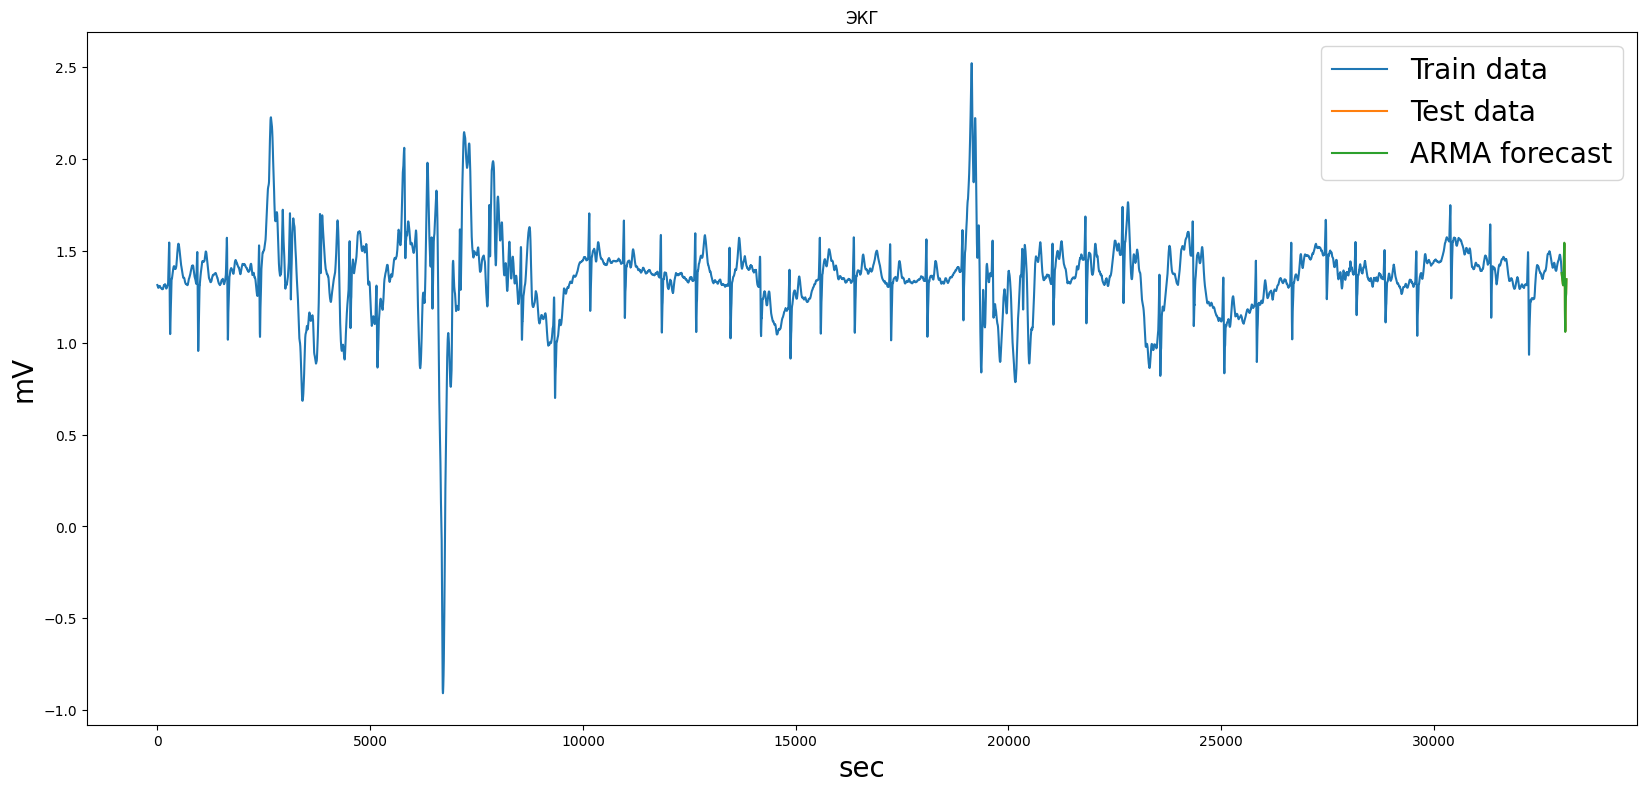

In [6]:
fig = plt.figure(figsize=(20, 9))
dur = len(arma_predictions)

plt.plot([i for i in range(0, size)], train, label='Train data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], test[:dur], label='Test data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], arma_predictions, label='ARMA forecast')
plt.legend(fontsize="20")
plt.title('ЭКГ')
plt.ylabel('mV', fontsize="20")
plt.xlabel('sec', fontsize="20")
plt.show()

In [9]:
from IPython.display import clear_output
%matplotlib inline
passengers = pd.read_csv('data/passengers.csv')
passengers['Month'] = pd.to_datetime(passengers['Month'])
pdf = passengers.set_index('Month').sort_index()
p_arma_model = ARIMA(pdf['Passengers'], order=(5,0,3))
p_arma_model_fit = p_arma_model.fit()

C:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


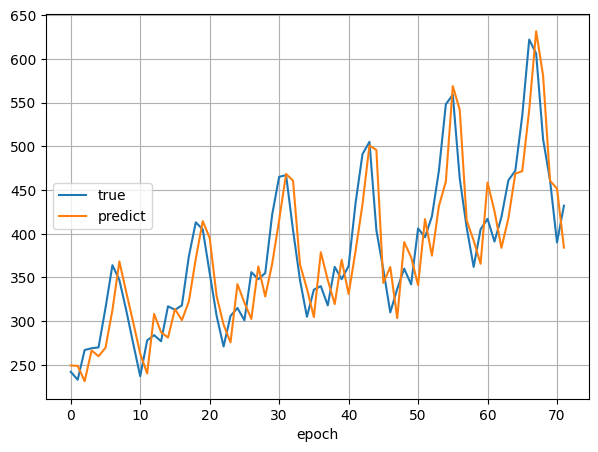

In [10]:
def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left')
    plt.show()

series = pdf["Passengers"]
size = int(series.shape[0] * 0.5)
train, test = series[:size], series[size:len(series)]
history = [x for x in train.values]
predictions = []

val = {"true":[], "predict":[]}
for t in test.values:
    model = ARIMA(history, order=(5,1,0)).fit()
    output = model.forecast()
    yhat = output[0]
    predictions.append(yhat)
    val["predict"].append(yhat)
    val["true"].append(t)
    history.append(t)
    live_plot(val)

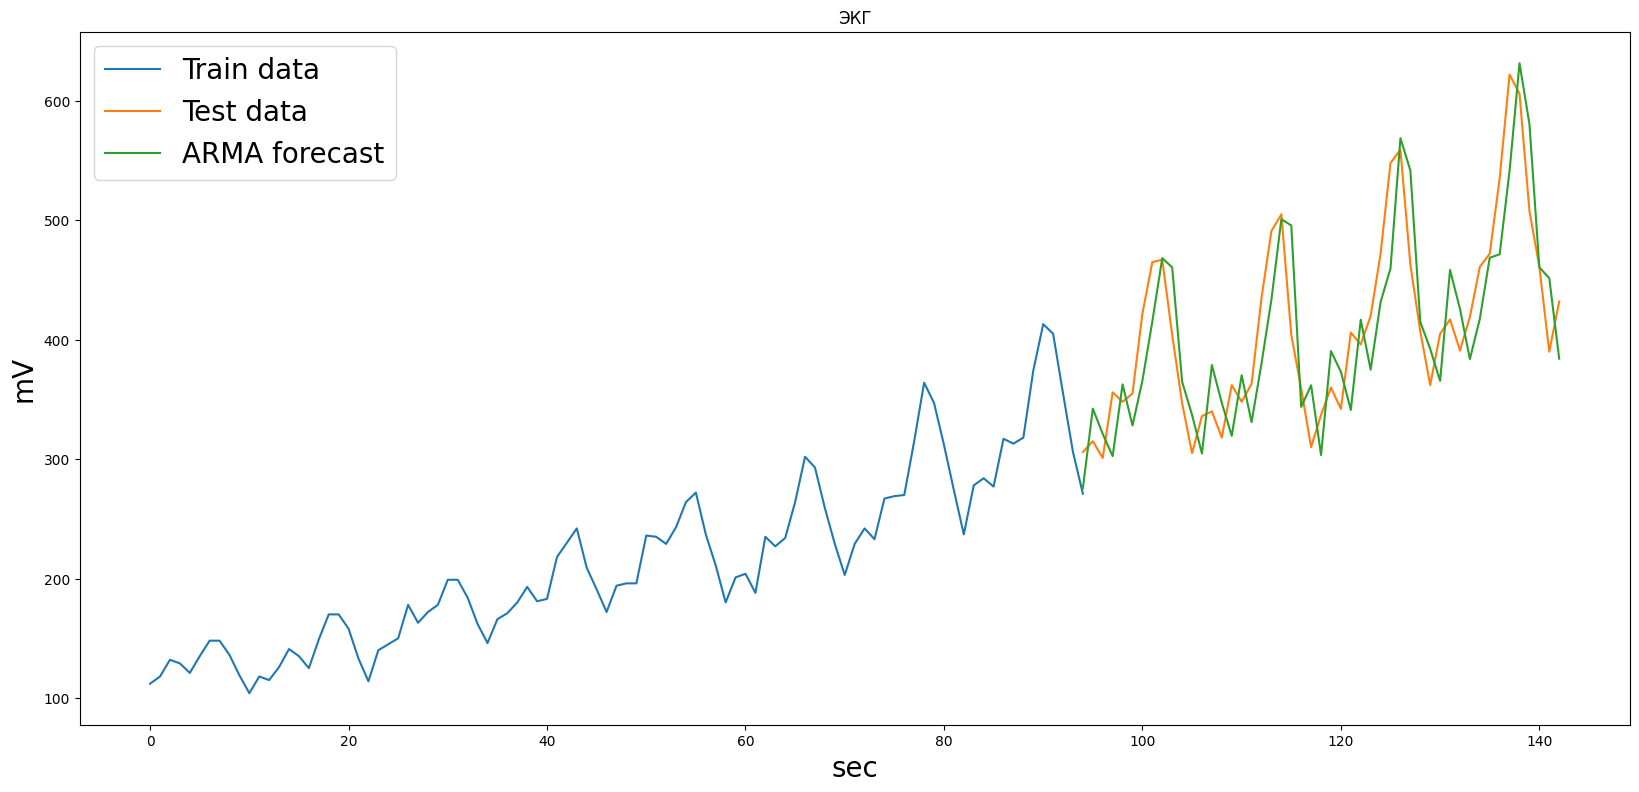

In [11]:
X = pdf['Passengers'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
arma_predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    arma_predictions.append(yhat)
    obs = test[t]
    history.append(obs)

fig = plt.figure(figsize=(20, 9))
dur = len(arma_predictions)

plt.plot([i for i in range(0, size)], train, label='Train data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], test[:dur], label='Test data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], arma_predictions, label='ARMA forecast')
plt.legend(fontsize="20")
plt.title('ЭКГ')
plt.ylabel('mV', fontsize="20")
plt.xlabel('sec', fontsize="20")
plt.show()

In [13]:
arima_model = ARIMA(pdf['Passengers'], order=(10,2,10))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

C:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:               ARIMA(10, 2, 10)   Log Likelihood                -555.051
Date:                Sat, 25 Nov 2023   AIC                           1152.101
Time:                        16:59:41   BIC                           1214.174
Sample:                    01-01-1949   HQIC                          1177.325
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0737      0.062      1.196      0.232      -0.047       0.195
ar.L2         -1.0001      0.082    -12.218      0.000      -1.161      -0.840
ar.L3          0.0154      0.094      0.163      0.8

C:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
output = arima_model_fit.forecast()
X = pdf['Passengers'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
arima_predictions = list()
# walk-forward validation
for t in range(len(test)):
    arima_model = ARIMA(history, order=(10,2,5))
    arima_model_fit = arima_model.fit()
    output = arima_model_fit.forecast()
    yhat = output[0]
    arima_predictions.append(yhat)
    obs = test[t]
    history.append(obs)

C:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization

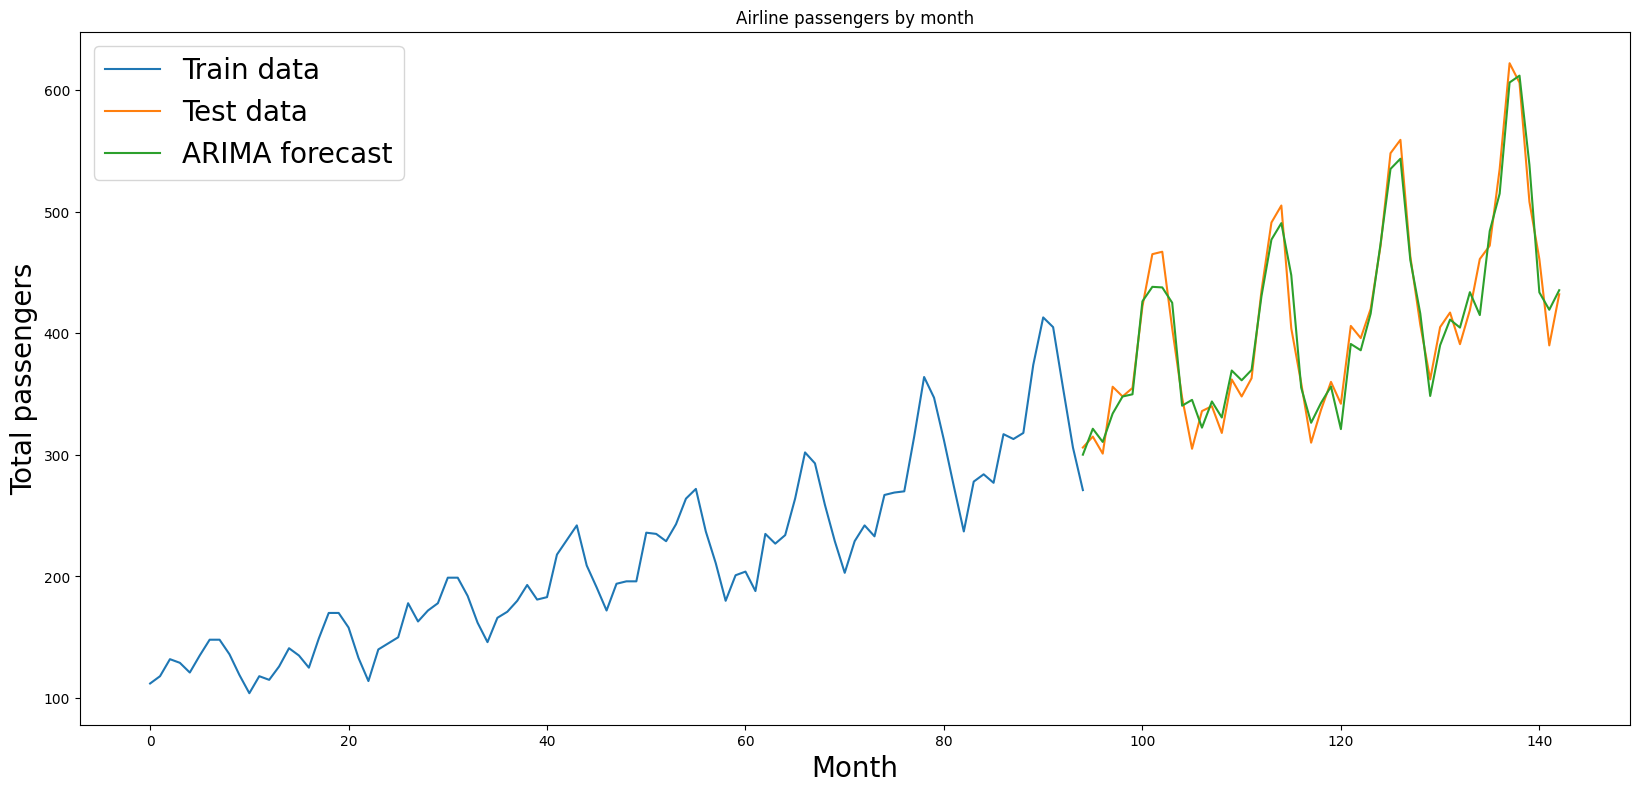

In [15]:
fig = plt.figure(figsize=(20, 9))
plt.plot([i for i in range(0, size)], train, label='Train data')
plt.plot([i for i in range(size - 1, len(X) - 1)], test, label='Test data')
plt.plot([i for i in range(size - 1, len(X) - 1)], arima_predictions, label='ARIMA forecast')
plt.legend(fontsize="20")
plt.title('Airline passengers by month')
plt.ylabel('Total passengers', fontsize="20")
plt.xlabel('Month', fontsize="20")
plt.show()

4.2 Оценка метрик (Сравнение ARMA и ARIMA)

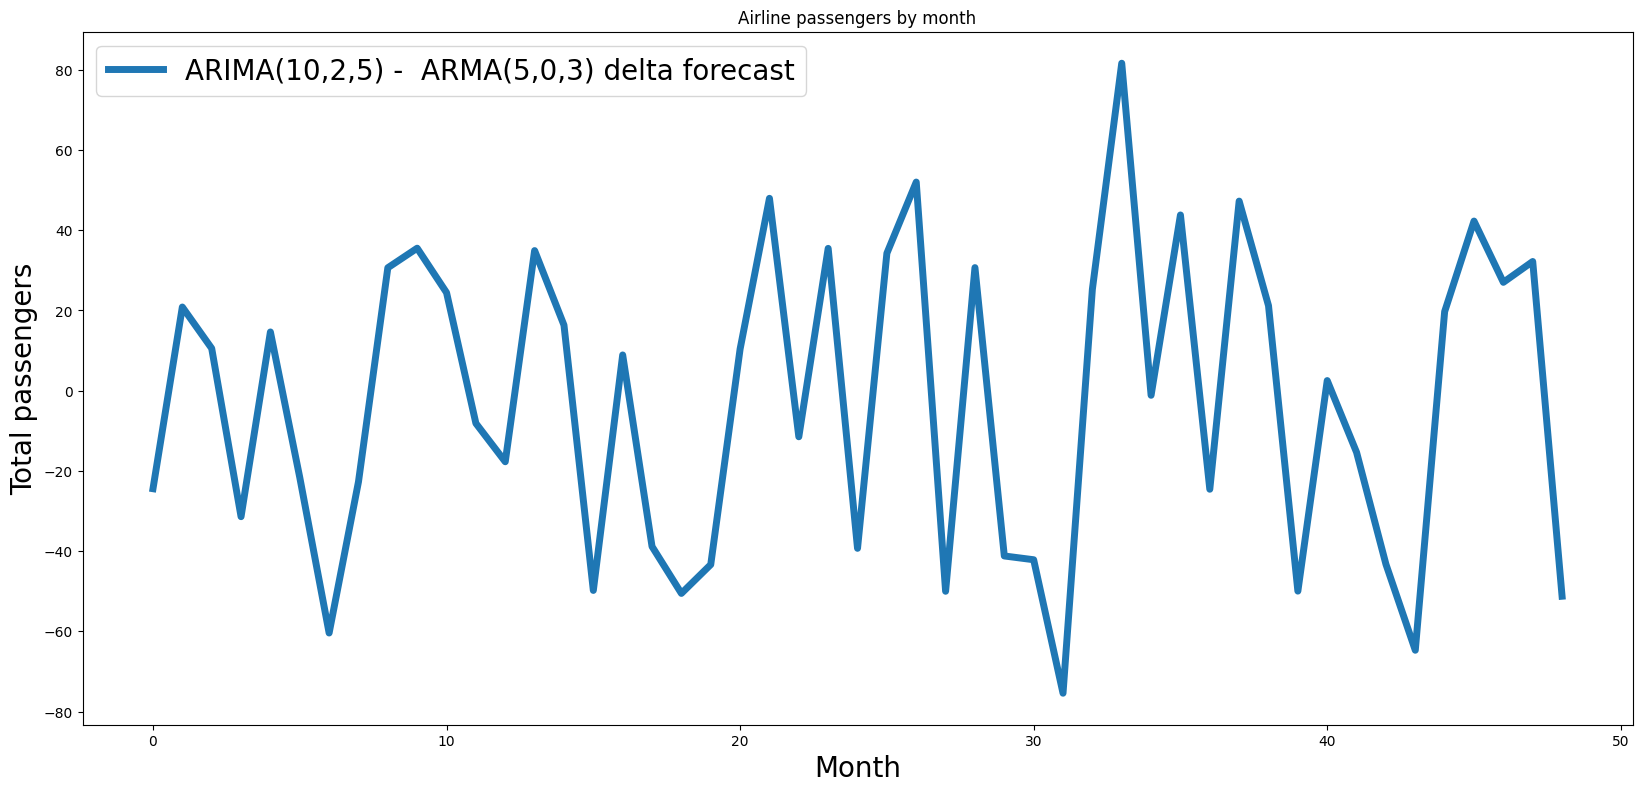

In [17]:
fig = plt.figure(figsize=(20, 9))
delta = []
for i in range(len(arima_predictions)):
    delta.append(arma_predictions[i] - arima_predictions[i])

plt.plot(delta, label='ARIMA(10,2,5) -  ARMA(5,0,3) delta forecast', linewidth=5)
plt.legend(fontsize="20")
plt.title('Airline passengers by month')
plt.ylabel('Total passengers', fontsize="20")
plt.xlabel('Month', fontsize="20")
plt.show()

4.3 Делаем пропуски

<Axes: xlabel='Month'>

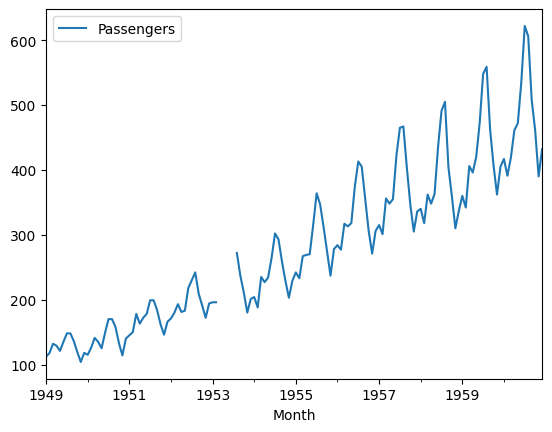

In [18]:
o_df = pdf.copy()
o_df["Passengers"][50:55] = np.nan
o_df.plot()

4.4 Заполнение пропусков

а) средним и медианой

C:\Users\artem\AppData\Local\Temp\ipykernel_19592\979543150.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_value = (o_df["Passengers"][55] + o_df["Passengers"][49])/2


<Axes: title={'center': 'среднее из предыдущего и последующего'}, xlabel='Month'>

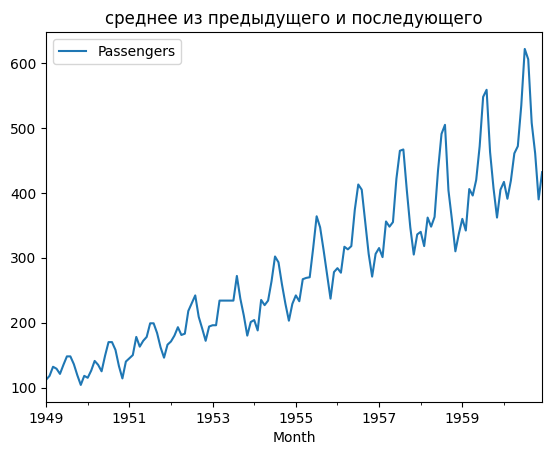

In [19]:
new_value = (o_df["Passengers"][55] + o_df["Passengers"][49])/2
o_df["Passengers"][50:55] = new_value
o_df.plot(title="среднее из предыдущего и последующего")

б) предыдущим и последующим значениями

C:\Users\artem\AppData\Local\Temp\ipykernel_19592\2103388607.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_value = o_df["Passengers"][49]


<Axes: title={'center': 'Предыдущее значение'}, xlabel='Month'>

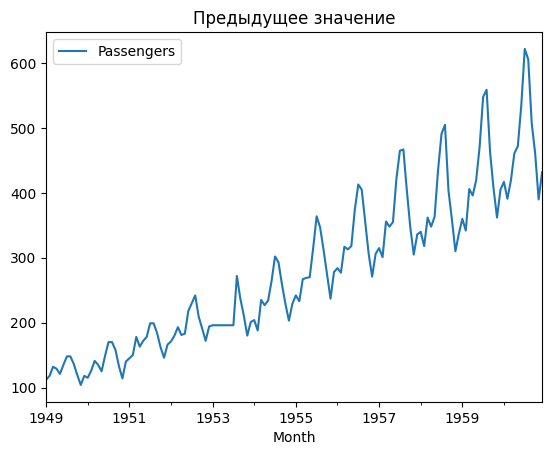

In [21]:
new_value = o_df["Passengers"][49]
o_df["Passengers"][50:55] = new_value
o_df.plot(title='Предыдущее значение')

C:\Users\artem\AppData\Local\Temp\ipykernel_19592\653637212.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_value = o_df["Passengers"][55]


<Axes: title={'center': 'Последующее значение'}, xlabel='Month'>

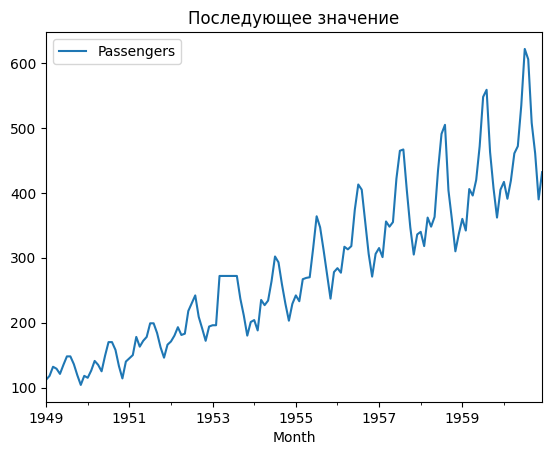

In [22]:
new_value = o_df["Passengers"][55]
o_df["Passengers"][50:55] = new_value
o_df.plot(title='Последующее значение')

в) скользящим средним и медианой

<Axes: title={'center': 'среднее'}, xlabel='Month'>

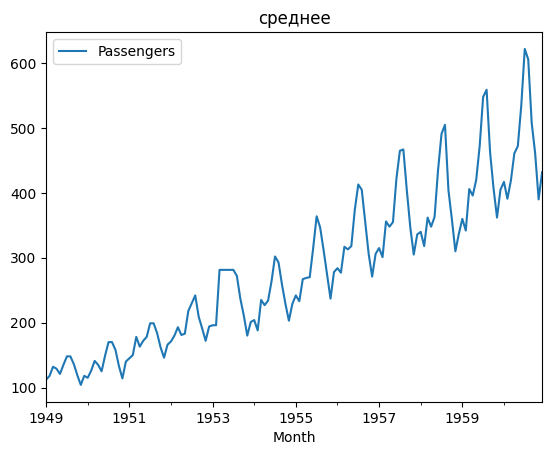

In [23]:
new_value = o_df["Passengers"].mean()
o_df["Passengers"][50:55] = new_value
o_df.plot(title='среднее') 

<Axes: title={'center': 'медиана'}, xlabel='Month'>

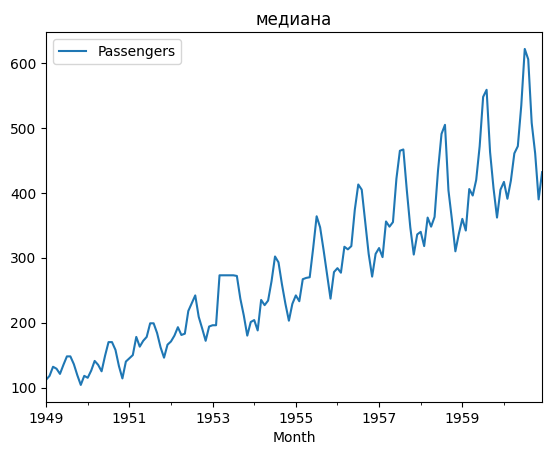

In [24]:
new_value = o_df["Passengers"].median()
o_df["Passengers"][50:55] = new_value
o_df.plot(title='медиана') 

г) интерполяцией

<Axes: title={'center': 'zero'}, xlabel='Month'>

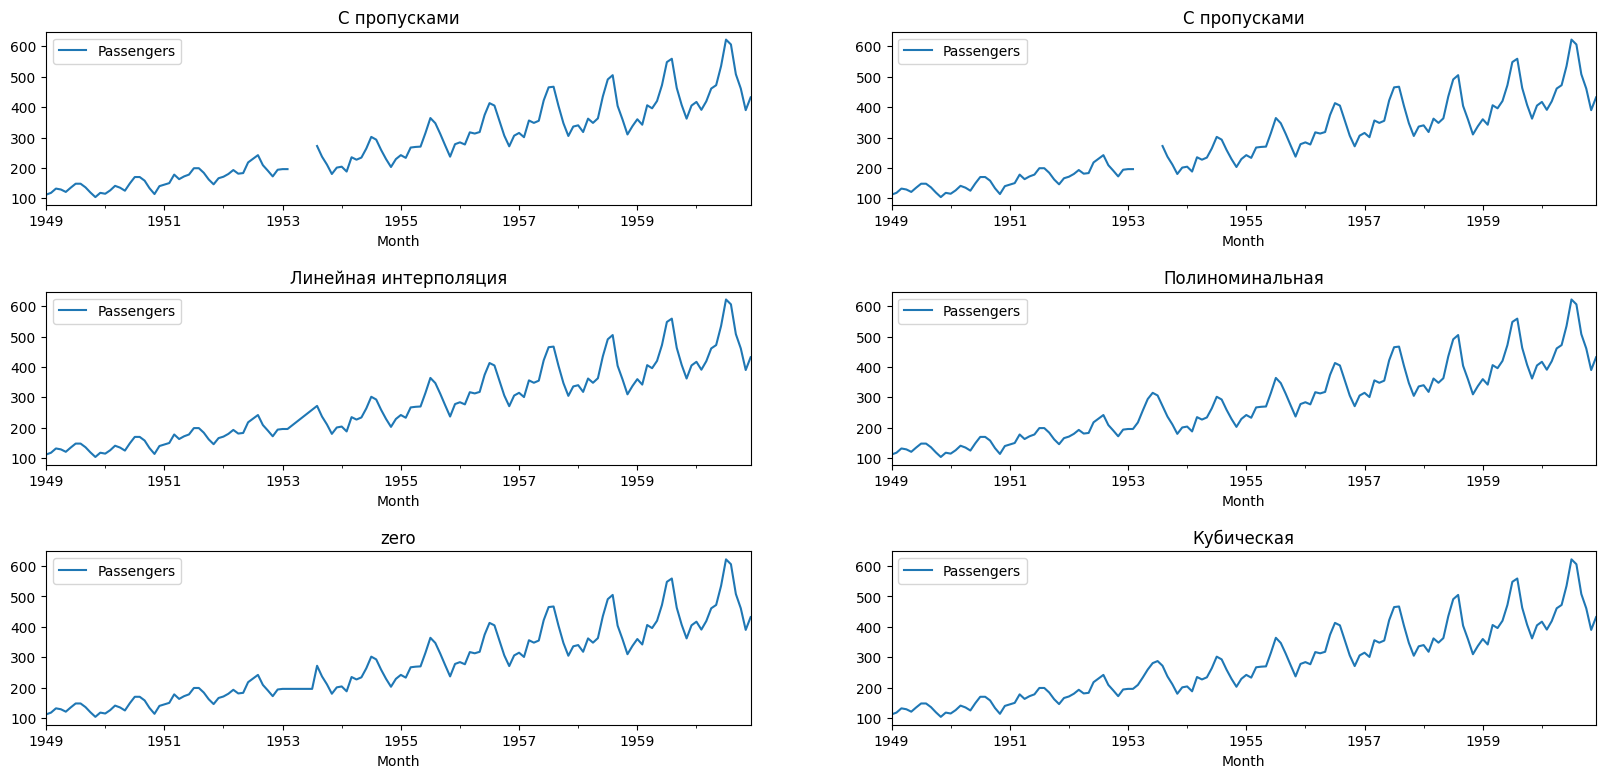

In [25]:
o_df["Passengers"][50:55] = np.nan
lin_df = o_df.interpolate(method="linear")
cub_df = o_df.interpolate(method="cubic")
pol_df = o_df.interpolate(method="polynomial", order=5)
zero_df = o_df.interpolate(method="zero")

fig = plt.figure(figsize=(20, 9))
layout = (3, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

original_ax = plt.subplot2grid(layout, (0, 0))
lin_ax = plt.subplot2grid(layout, (1, 0))
cub_ax = plt.subplot2grid(layout, (2, 1))

pol_ax = plt.subplot2grid(layout, (1, 1))
zero_ax = plt.subplot2grid(layout, (2, 0))
 
o_df.plot(title="С пропусками", ax = original_ax)  
o_df.plot(title="С пропусками", ax = plt.subplot2grid(layout, (0, 1)))  
lin_df.plot(title="Линейная интерполяция", ax = lin_ax) 
cub_df.plot(title="Кубическая", ax = cub_ax) 
pol_df.plot(title="Полиноминальная", ax = pol_ax) 
zero_df.plot(title="zero", ax=zero_ax)

4.5 Поиск выбросов

<Axes: >

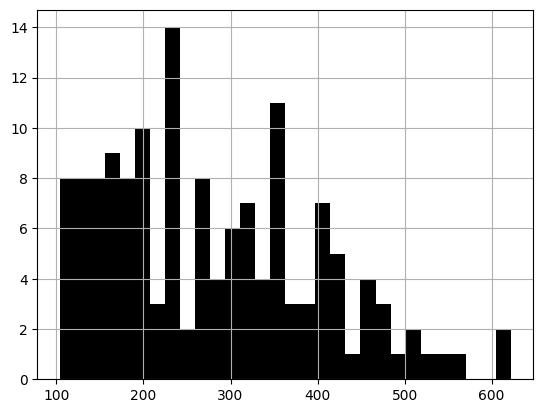

In [27]:
import seaborn as sns
pdf["Passengers"].hist(bins=30, color="black")

<Axes: >

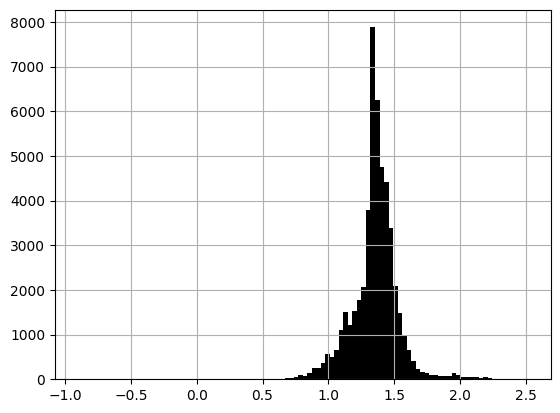

In [28]:
ecg["1"].hist(bins=100, color="black",)

Text(0.5, 1.0, 'Пассажиры')

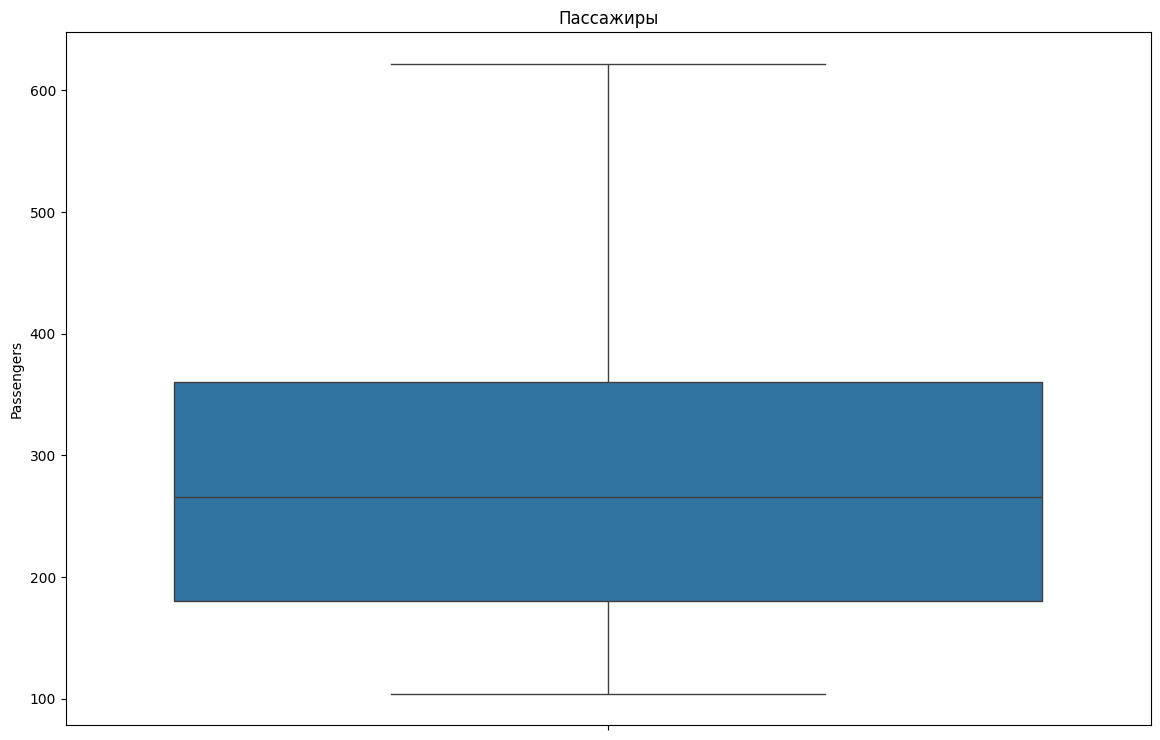

In [29]:
fig = plt.figure(figsize=(14, 9))
sns.boxplot(pdf.Passengers).set_title('Пассажиры')

Text(0.5, 1.0, 'ЭКГ')

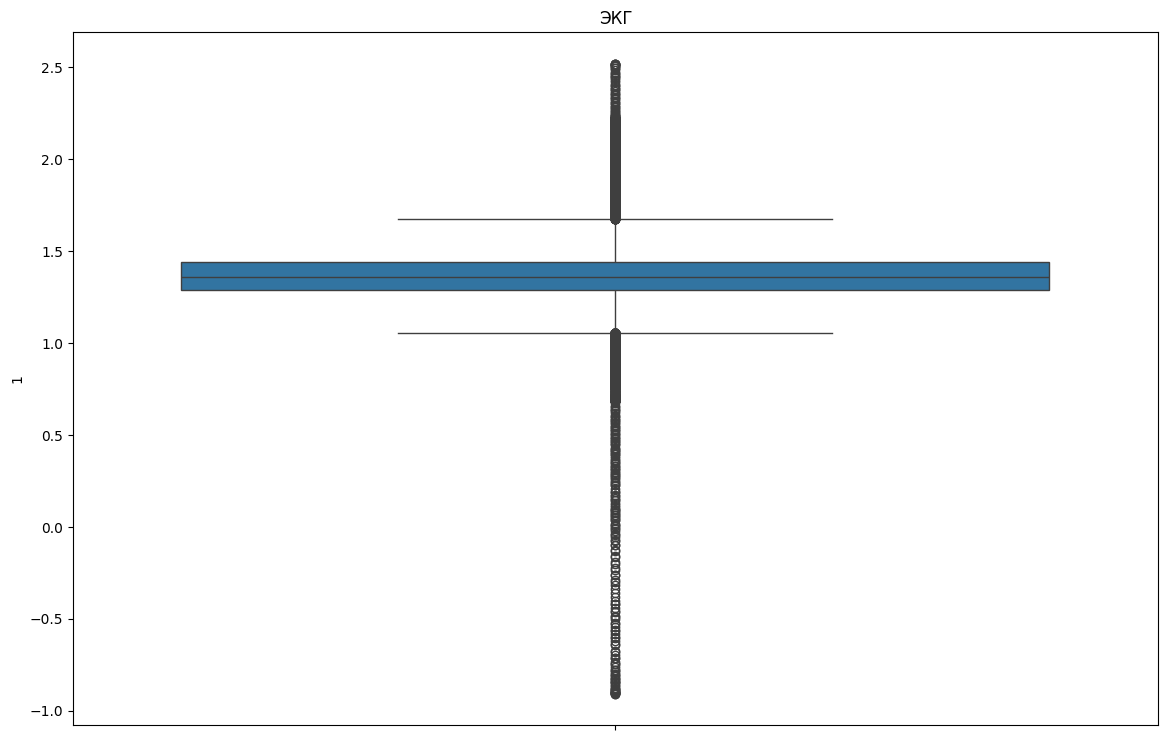

In [30]:
fig = plt.figure(figsize=(14, 9))
ax = sns.boxplot(ecg["1"])
ax.set_title('ЭКГ')

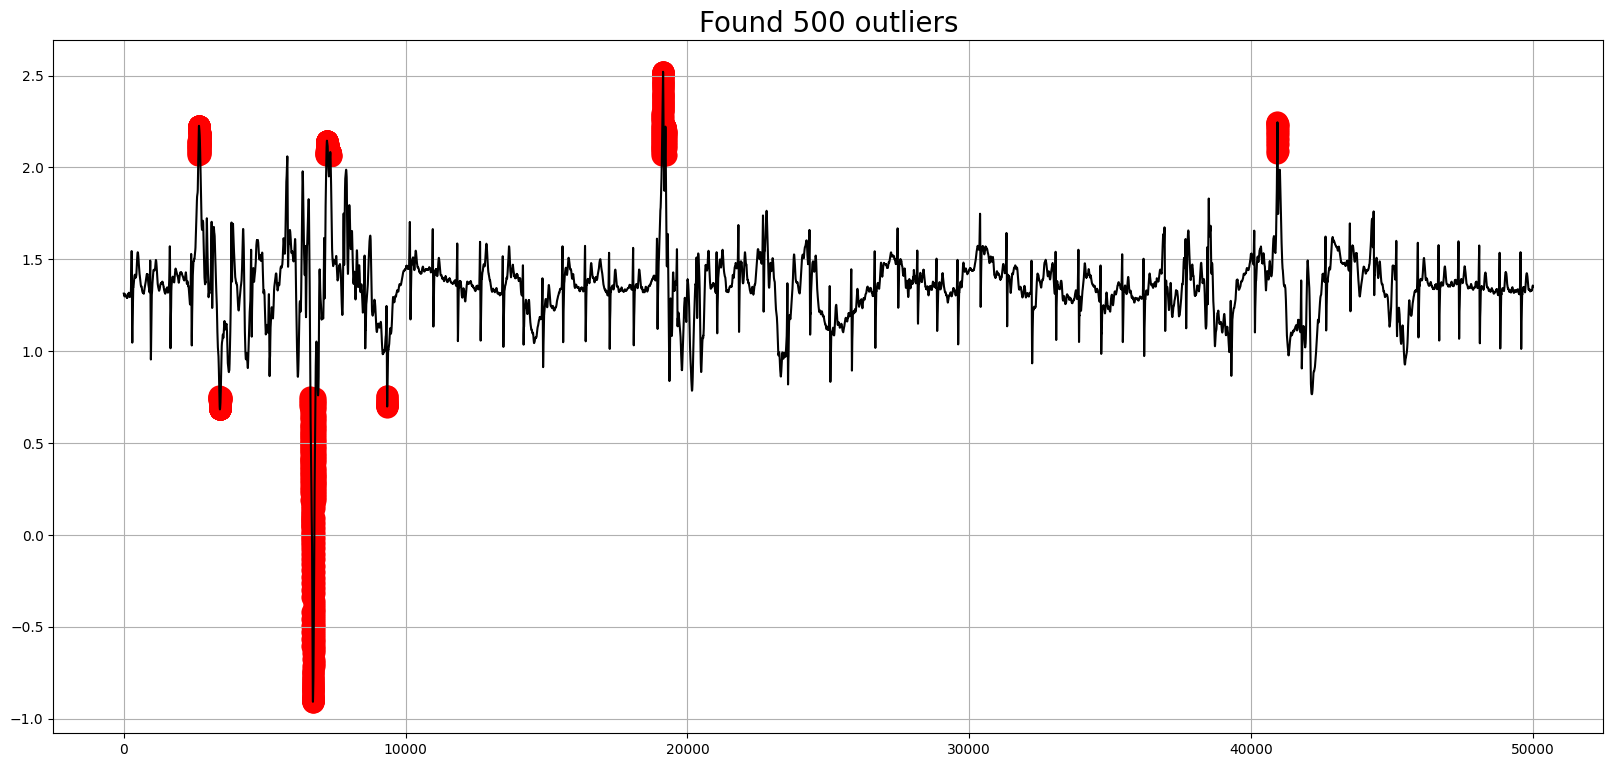

In [31]:
from sklearn import preprocessing, svm

scaler = preprocessing.StandardScaler()
perc = 0.01
local_df = ecg["1"]

ts_scaled = scaler.fit_transform(local_df.values.reshape(-1,1))
model = svm.OneClassSVM(nu=perc, kernel="rbf", gamma=0.01)
model.fit(ts_scaled)
dtf_outliers =local_df.to_frame(name="ts")
dtf_outliers["index"] = range(len(local_df))
dtf_outliers["outlier"] = model.predict(ts_scaled)
dtf_outliers["outlier"] = dtf_outliers["outlier"].apply(lambda x: 1 if x==-1 else 0)
fig, ax = plt.subplots(figsize=(20, 9))
ax.plot(dtf_outliers["index"], dtf_outliers["ts"], color="black")
ax.scatter(x=dtf_outliers[dtf_outliers["outlier"]==1]["index"], y=dtf_outliers[dtf_outliers["outlier"]==1]['ts'], color='red', linewidths=10)
plt.title(f"Found {sum(dtf_outliers['outlier']==1)} outliers", fontdict={'fontsize': 20})
ax.grid(True)
plt.show()

4.6 Убираем выбросы интерполяцией

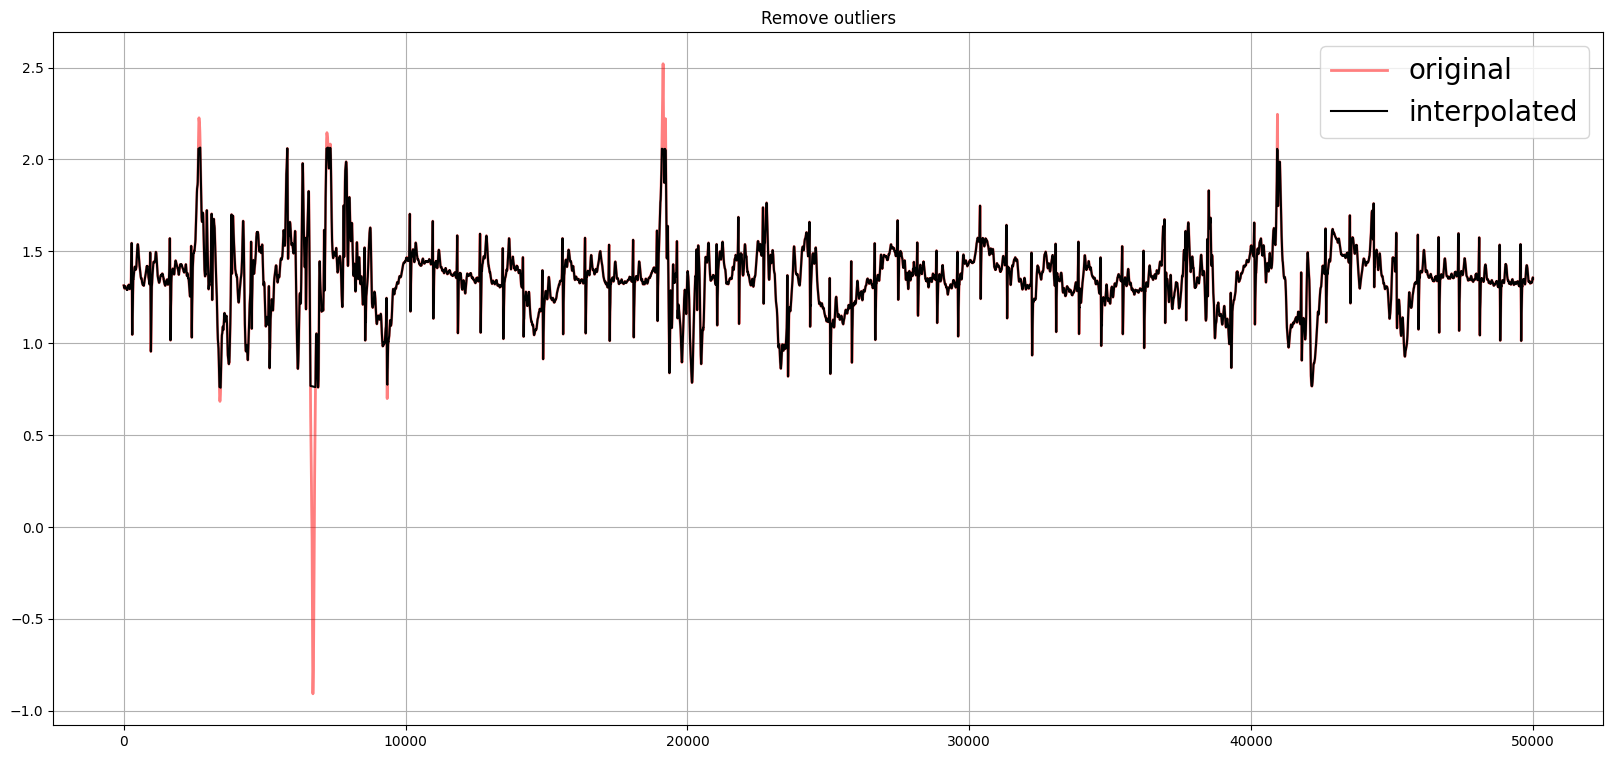

In [32]:
outliers_idx = dtf_outliers[dtf_outliers["outlier"]==1].index

ts_clean = local_df.copy()
ts_clean.loc[outliers_idx] = np.nan
ts_clean = ts_clean.interpolate(method="linear")
ax = local_df.plot(figsize=(20, 9), color="red", alpha=0.5, title="Remove outliers", label="original", legend=True, linewidth=2)
ts_clean.plot(ax=ax, grid=True, color="black", label="interpolated", legend=True)
plt.legend(fontsize="20")
plt.show()